# Iconic images for EAMENA Concepts

Associate one image to a EAMENA concept to illustrate this latter (ex: Threat type = Agricultural/Pastoral). Insert the concept UUID to the image's metadata (ex: 767e9467-3bc2-3f71-9427-0ace387bd843).

<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/concepts_images_threat_type_agricole.png" width = "500">

</center>

The objective is to link the concept image UUID to the RM (ex: node Threat type) and display these images in a `pyvis` interactive graph

## Libraries and paths

In [ ]:
%cd /content/
!rm /content/eamena-data -R
!git clone https://github.com/eamena-project/eamena-data.git

!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install  -q -r  cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm
%cd /content/

!rm eamena-functions -R
!git clone https://github.com/eamena-project/eamena-functions.git
# %cd /content/eamena-functions/mds
# import mds
%cd /content/eamena-functions/
import mds
from mds import mds

# librairies
# for the images..
import os
import pandas as pd
!pip install exif
from exif import Image as exImg
from IPython.display import Image as IpImg
from IPython.display import Markdown, display, HTML, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive
# ..and for the graph
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from pyvis import network as net
import folium
import json
from google.colab import files

cases_path = "/content/eamena-data/reference-data/concepts/heritage_places/cases/"
cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/" # cases_path + "img/"
# list
list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list.tsv'

In [53]:
cases_path = "/content/eamena-data/reference-data/concepts/heritage_places/cases/"
cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/" # cases_path + "img/"

## Metadata

Photographs of iconic cases of threats types (agricole, vandalsim, etc.)

In [54]:
df_list = pd.read_csv(list_path, sep='\t')
df_list['image_path'] = cases_img_path + df_list['image']
df_list

,label,image,uuid,uuid_parent,image_path
0,Threat type - Agricultural/Pastoral,threattype-agricole.jpg,767e9467-3bc2-3f71-9427-0ace387bd843,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
1,Threat type - Vandalism,threattype-vandalism-1.jpg,4e66f55d-0717-4d1f-89aa-949771ace643,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
2,Threat type - Looting and Illegal Activities,threattype-looting.jpg,66457bbc-965b-36aa-8fff-de0a28b68f33,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
3,Threat type - Building and Development,threattype-urbanism.jpg,8e602902-3c8a-3430-a7df-fff6df57db8b,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...


In [19]:
contents = os.listdir(cases_img_path)
print("\n".join(contents))

threattype-natural.jpg
threattype-looting.jpg
threattype-vandalism.jpg
threattype-reuse.jpg
threattype-urbanism.jpg
threattype-natural-1.jpg
threattype-explosives.png
threattype-agricole.jpg
threattype-vandalism-1.jpg


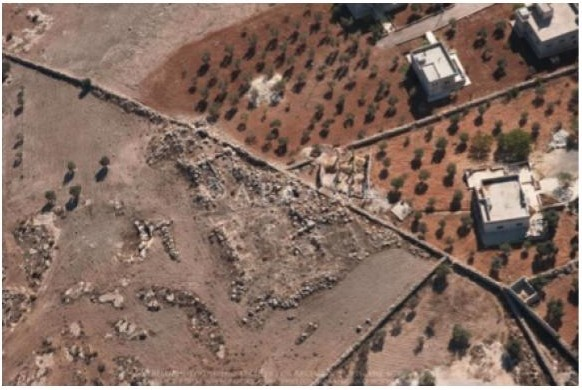

In [20]:
IpImg(cases_img_path + "threattype-agricole.jpg")

### Read

In [21]:
img_path = cases_img_path + "threattype-agricole.jpg"
with open(img_path, 'rb') as img_file:
    img = exImg(img_file)
print("Image has EXIF metadata: " + str(img.has_exif))
sorted(img.list_all())

Image has EXIF metadata: False


[]

### Write

In [22]:
img.make = '767e9467-3bc2-3f71-9427-0ace387bd843' # = Threat type - Vandalism in the RDM
img.model = 'Threat type - Agricultural/Pastoral'
with open(img_path, 'wb') as new_image_file:
        new_image_file.write(img.get_file())

### Check

**Threat type - Agricultural/Pastoral**

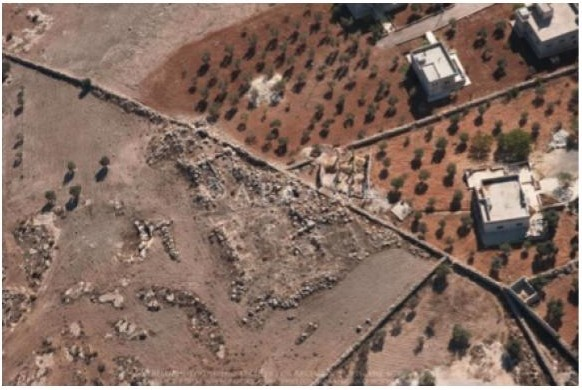

**767e9467-3bc2-3f71-9427-0ace387bd843**

In [23]:
with open(img_path, 'rb') as img_file:
    img = exImg(img_file)
# img.get("make")
title = img.get("model")
uuid = img.get("make")
display(Markdown(f"**{title}**"))
display(IpImg(img_path))
display(Markdown(f"**{uuid}**"))

## GUI

TODO: Show the image with its UUID below and its title above

In [24]:
# Get the list of image files in the folder
image_files = [f for f in os.listdir(cases_img_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Create a radio button widget with the list of image files as options
image_selector = widgets.RadioButtons(
    options=image_files,
    description='Select Image:',
    disabled=False
)

# Create an output widget to hold the image display
output_image = widgets.Output()

# Function to display the selected image
def display_image(selected_image):
    with output_image:
        clear_output(wait=True)  # Clear the output area before displaying the new image
        image_path = os.path.join(cases_img_path, selected_image)
        display(IpImg(filename=image_path, width=400, height=400))

# Event handler for changes in the radio button selection
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        selected_image = change['new']
        display_image(selected_image)

# Attach the event handler to the radio button widget
image_selector.observe(on_change)

# Display the radio button widget and the initial image output widget
display(image_selector)
display(output_image)  # Display the output area for images

# Display the initial image (first image in the list)
initial_image = image_files[0]
display_image(initial_image)

RadioButtons(description='Select Image:', options=('threattype-natural.jpg', 'threattype-looting.jpg', 'threat…

Output()

## Graph

In [27]:
my_rm = 'EAMENA'
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
gm.rm_selected_one(my_rm, gm.rm_list())
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')

/content/cultural-heritage/graph-parser
EAMENA_Heritage%20Place.json has been loaded into the folder inputResourceModels/


In [55]:
df_list

,label,image,uuid,uuid_parent,image_path
0,Threat type - Agricultural/Pastoral,threattype-agricole.jpg,767e9467-3bc2-3f71-9427-0ace387bd843,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
1,Threat type - Vandalism,threattype-vandalism-1.jpg,4e66f55d-0717-4d1f-89aa-949771ace643,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
2,Threat type - Looting and Illegal Activities,threattype-looting.jpg,66457bbc-965b-36aa-8fff-de0a28b68f33,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
3,Threat type - Building and Development,threattype-urbanism.jpg,8e602902-3c8a-3430-a7df-fff6df57db8b,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...


In [72]:
rm_project= 'EAM'
filename = rm_project + "-erd.html"

# Create a new graph
G1 = nx.DiGraph()
mass = 10
size = 20

# Add nodes to the graph
for index, row in df_list.iterrows():
    G1.add_node(row['uuid'], crm = 'none', id = row['uuid'], name = row['label'], label = row['label'], title = 'lorem', color = 'none', size = size, mass = mass, shape='image', image = row['image_path'])
# for index, row in nodes_df.iterrows():
#     # Exclude 'node_id' from the attributes dictionary
#     attrs = row.drop('uuid').to_dict()
#     G1.add_node(row['uuid'], **attrs)

# Add edges to the graph
for index, row in df_list.iterrows():
    G1.add_edge(row['uuid'], row['uuid_parent'], label = "my_label")# , weight=row['weight'])

g1 = net.Network(notebook = True, cdn_resources='remote', directed = True, width="800px", height="300px")
filename = "pyvis-example.html"
g1.from_nx(G1)
g1.save_graph(filename)
HTML(filename=filename)
# G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
# hp_G = gm.plot_net_graph(G1, filename = filename, width = "1200px", height = "1000px")
# HTML(filename = filename)
# # Draw the network
# plt.figure(figsize=(8, 6))
# nx.draw(G1, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=2, font_size=15)
# plt.title('Network Graph')
# plt.show()

In [74]:
# G.edges()
G.node[0,len(G)]['shape'] = 'circle'

AttributeError: 'DiGraph' object has no attribute 'node'

In [79]:
for i in range(0,len(G)):
  G.node[i]['shape'] = 'circle'


AttributeError: 'DiGraph' object has no attribute 'node'

In [76]:
# show nodes attributes
for n in G.nodes(data=True):
  G.nodes[n]['shape'] = 'circle'
  G.nodes[n]['image'] = None
  # print(n)

TypeError: unhashable type: 'dict'

In [36]:
type(G)

networkx.classes.digraph.DiGraph

In [29]:
rm_project= 'EAMENA'
filename = rm_project + "-erd.html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
## previously with mds.mds_field_colors(), see ACHP ---------------------
# df_color = mds.mds_field_colors()
# G = gm.create_rm_graph(rm_project= rm_project, color_fields = df_color)
## ----------------------------------------------------------------------
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
hp_G = gm.plot_net_graph(G, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)
## Erreurs
